In [4]:
import pandas as pd
from fit import gee
from IPython.display import Markdown as md, display

# Read data


In [5]:
df=pd.read_csv('./data/article.csv')
df.loc[df['gender'] == 'Man', ['gender']] = 'moški'
df.loc[df['gender'] == 'Woman', ['gender']] = 'ženska'
df.loc[df['bmi_baseline_cat'] == 'Normal', ['bmi_baseline_cat']] = 'normalen'
df.loc[df['bmi_baseline_cat'] == 'Overweight', ['bmi_baseline_cat']] = 'debel'
df.loc[df['bmi_baseline_cat'] == 'Obese', ['bmi_baseline_cat']] = 'predebel'

# GEE

                               GEE Regression Results                              
Dep. Variable:                         hrv   No. Observations:                 8751
Model:                                 GEE   No. clusters:                      113
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                 588
Family:                           Gaussian   Mean cluster size:                77.4
Dependence structure:         Exchangeable   Num. iterations:                     9
Date:                     Sat, 27 Jan 2024   Scale:                         669.114
Covariance type:                    robust   Time:                         11:11:35
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercep

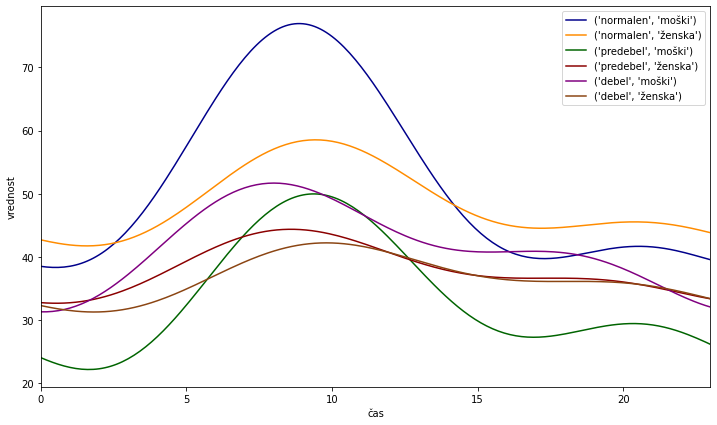

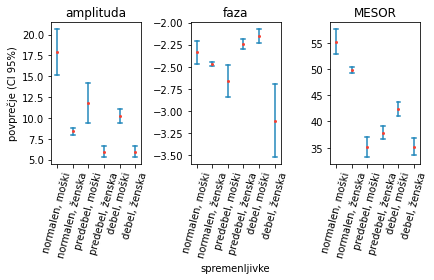

,amplitude,acrophase,mesor,locs,heights,parameter
0,19.33,-2.332347,57.63,[8.91],[76.95],"(normalen, moški)"
1,8.41,-2.463378,50.12,"[9.41, 20.42]","[58.53, 45.52]","(normalen, ženska)"
2,13.92,-2.463378,36.04,[9.41],[49.95],"(predebel, moški)"
3,5.86,-2.253728,38.49,"[8.61, 17.72]","[44.35, 36.6]","(predebel, ženska)"
4,10.21,-2.096492,41.47,"[8.01, 16.92]","[51.67, 40.86]","(debel, moški)"
5,5.48,-2.568202,36.72,"[9.81, 18.52]","[42.2, 36.09]","(debel, ženska)"


,parameter,amplitude,std_amplitude,amplitude_CIs,acrophase,std_acrophase,acrophase_CIs,mesor,std_mesor,mesor_CIs
0,"normalen, moški",17.93,6.28,"[5.62, 30.24]",-2.34,0.29,"[-2.91, -1.76]",55.24,5.55,"[44.36, 66.12]"
1,"normalen, ženska",8.42,0.97,"[6.53, 10.31]",-2.47,0.06,"[-2.59, -2.35]",49.8,1.48,"[46.91, 52.7]"
2,"predebel, moški",11.77,5.57,"[0.85, 22.69]",-2.66,0.42,"[-3.49, -1.84]",35.1,4.46,"[26.36, 43.85]"
3,"predebel, ženska",5.92,1.48,"[3.01, 8.83]",-2.25,0.13,"[-2.5, -1.99]",37.88,2.68,"[32.63, 43.13]"
4,"debel, moški",10.27,1.93,"[6.49, 14.04]",-2.15,0.18,"[-2.5, -1.8]",42.39,3.1,"[36.31, 48.48]"
5,"debel, ženska",5.92,1.52,"[2.94, 8.9]",-3.11,0.95,"[-4.97, -1.25]",35.23,3.49,"[28.38, 42.08]"


In [6]:
df1=gee.gee_cosinor(df, 'hrv', 'Hour_of_Day', 'participant_id', interactions=['bmi_baseline_cat', 'gender'],n_components=2,save_to='./results/demo/gee_example.png',summary=True)
df2=gee.calculate_confidence_intervals_parameters_cosinor(df, 'hrv', 'Hour_of_Day', 'participant_id', interactions=['bmi_baseline_cat', 'gender'],n_components=2,save_to='./results/demo/gee_example_ci.png')
display(df1)
display(df2)


